In [1]:
## imports

import pandas as pd
import nltk
from sentence_transformers import SentenceTransformer
from embeddings import * 

# Clustering

## Semantic Clusters

In [ ]:
test_user = user_profile_init(38, "fr", "en", ["ru", "pl"])

In [ ]:
## embed top 5,000 words in target language using embeddings.py

target_lang_code = "en"

combined_vocab_df = pd.read_csv("vocab_final.csv", encoding="utf-8", index_col=0)      # load vocab
model = SentenceTransformer("distiluse-base-multilingual-cased-v1")                     # load semantic embed model
vocab = combined_vocab_df[target_lang_code]
sem_vecs = get_semantic_embeddings(vocab[:5], model)
com_vecs = get_complexity_embeddings(vocab[:5], )

for i in range(0,5):
    print(vocab[i])
    print(sem_vecs[i])


abandon
[0.02009648270905018, -0.03218023106455803, -0.030821779742836952, -0.03648429736495018, -0.06113017350435257, -0.061205312609672546, 0.0022092845756560564, -0.05215407535433769, -0.009815630502998829, -0.04876004531979561, -0.034922510385513306, -0.040736906230449677, -0.016998862847685814, 0.011789573356509209, 0.0478660874068737, -0.01641954854130745, 0.016346128657460213, -0.018096648156642914, -0.0018247074913233519, -0.014749952591955662, 0.008438128046691418, 0.05342534929513931, 0.05154244229197502, -0.031075207516551018, 0.013614152558147907, 0.053158294409513474, 0.014288648962974548, 0.005325114354491234, -0.07284092158079147, -0.005256850738078356, -0.05892394110560417, -0.03444608300924301, 0.01961033046245575, -0.019640887156128883, -0.0482112392783165, -0.05623484030365944, -0.025146881118416786, -0.04750848934054375, -0.006465787533670664, 0.06586973369121552, 0.006257434841245413, -0.013899218291044235, 0.004441710654646158, -0.058783646672964096, 0.02752942033

## Compute inertia

In [6]:
## more imports
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
## compute intertia
data = [y for (x,y) in words_and_vecs]

inertias = []

for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

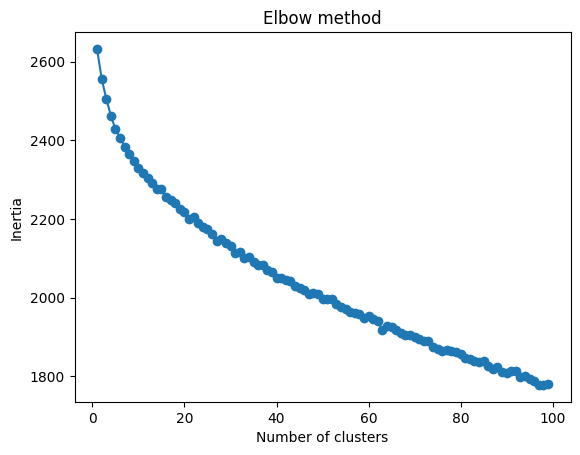

In [8]:
plt.plot(range(1,100), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
## cluster based on intertia computed
kmeans = KMeans(n_clusters=50, random_state=42)
labels = kmeans.fit_predict(data)

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import umap

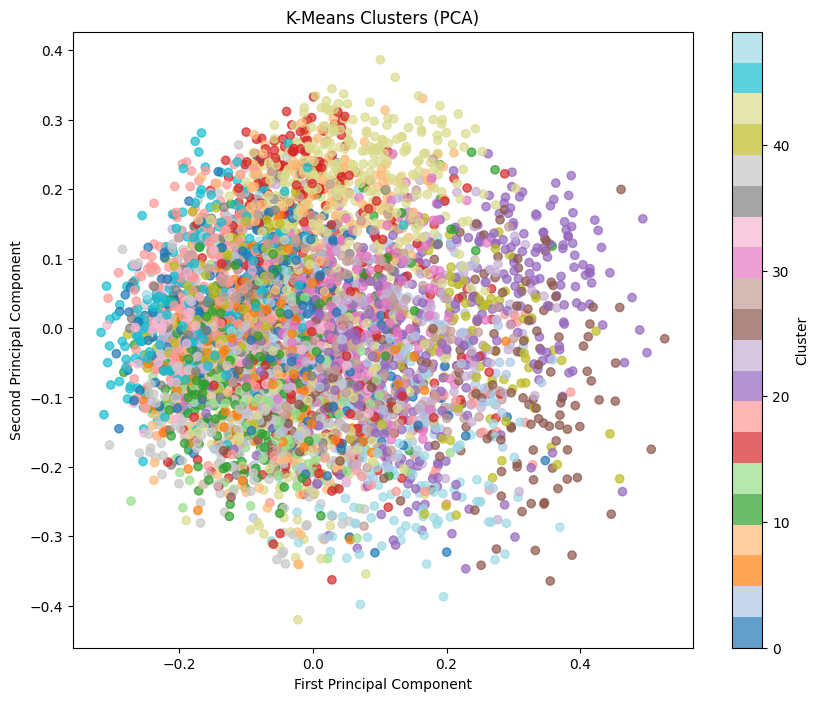

In [11]:
pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab20', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [12]:
clusters = {}
for cluster_id in range(50):
    cluster_indices = np.where(labels == cluster_id)[0]
    clusters[cluster_id] = [vocab[i] for i in cluster_indices]

# Print all clusters
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {words}")

Cluster 0: ['article', 'author', 'blog', 'book', 'chapter', 'copy', 'diary', 'document', 'documentary', 'edition', 'editor', 'email', 'essay', 'fiction', 'headline', 'journal', 'journalist', 'lecture', 'letter', 'literature', 'magazine', 'mail', 'media', 'message', 'narrative', 'news', 'newspaper', 'novel', 'page', 'paper', 'paragraph', 'poem', 'poet', 'poetry', 'post', 'poster', 'print', 'printing', 'publication', 'publish', 'read', 'reader', 'reading', 'record', 'recording', 'reporter', 'script', 'sheet', 'stamp', 'story', 'subject', 'text', 'theme', 'title', 'topic', 'write', 'writer', 'writing', 'written', 'archive', 'biography', 'columnist', 'correspondence', 'documentation', 'editorial', 'envelope', 'forum', 'historian', 'journalism', 'leaflet', 'literary', 'manuscript', 'memo', 'memoir', 'newsletter', 'notebook', 'novel', 'novelist', 'post-war', 'publishing', 'spam', 'textbook', 'thesis', 'thread', 'transcript']
Cluster 1: ['adult', 'alone', 'animal', 'anybody', 'anyone', 'baby'

## Complexity Clusters

In [1]:
from embeddings import * 

In [2]:
## creating a test user profile
test_user_profile = user_profile_init(54, "french", "english", ["russian"])

In [17]:
words_and_complexity_vecs = []
order_count = 0

for word in vocab:
    embedding = get_complexity_embedding(word, test_user_profile)
    words_and_complexity_vecs.append((word, embedding))
    print(str(order_count) + str((word, embedding[:3])))
    order_count += 1

0('abandon', array([0.63367809, 0.72420353, 0.27157632]))
1('ability', array([0.38519144, 0.88043758, 0.27513674]))
2('able', array([0.69368797, 0.69368797, 0.17342199]))
3('about', array([0.32955867, 0.92276427, 0.1977352 ]))
4('above', array([0.67815705, 0.67815705, 0.27126282]))
5('abroad', array([0.3650012, 0.912503 , 0.1825006]))
6('absolute', array([0.69565217, 0.69565217, 0.17391304]))
7('absolutely', array([0.43628622, 0.87257244, 0.21814311]))
8('academic', array([0.68308736, 0.68308736, 0.25615776]))
9('accept', array([0.63441664, 0.74015275, 0.21147221]))
10('acceptable', array([0.69122265, 0.69122265, 0.20736679]))
11('access', array([0.38634678, 0.90147582, 0.19317339]))
12('accident', array([0.68299392, 0.68299392, 0.25612272]))
13('accommodation', array([0.70705108, 0.65266254, 0.27194272]))
14('accompany', array([0.45267857, 0.85505952, 0.2514881 ]))
15('according\xa0to', array([0.50295569, 0.83825948, 0.20956487]))
16('account', array([0.41610354, 0.89165045, 0.1783300

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))